# Importing Libraries

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection

from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression
from sklearn.utils import check_random_state

In [8]:
# Used for styling of graphs
!pip install SciencePlots

import scienceplots
plt.style.use(['science', 'grid', 'no-latex'])

# Initialising Data

In [9]:
n = 100
randomState = check_random_state(0)

xData = np.arange(n)
yData = randomState.randint(-50, 50, size=(n,)) + 50.0 * np.log1p(np.arange(n))

# Model

In [10]:
model = IsotonicRegression(out_of_bounds="clip")
y_ = model.fit_transform(xData, yData)

# Plotting results

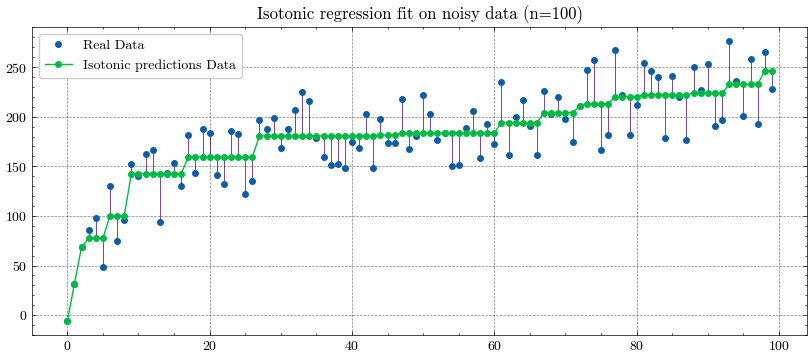

In [11]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10,4))

segments = [[[i, yData[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(yData)))
lc.set_linewidths(np.full(n, 0.5))

ax0.plot(xData, yData, "C0.", markersize=8, label='Real Data')
ax0.plot(xData, y_, "C1.-", markersize=8, label='Isotonic predictions Data')
ax0.add_collection(lc)
plt.title("Isotonic regression fit on noisy data (n=%d)" % n)

ax0.legend()
plt.show()

# Sensitivity analysis???

In [12]:
from sklearn.metrics import mean_squared_error

# Sensitivity analysis
randomStateSeeds = [0, 42, 99]
noiseLevels = [0, 0.1, 0.2]

for seed in randomStateSeeds:
  for noise in noiseLevels:
      noisy = model.transform(xData + noise * np.random.randn(n))
      mse = mean_squared_error(noisy, y_)
      print(f"Seed: {seed}, Data size: {n}, Noise: {noise}, MSE: {mse:.2f}")

Seed: 0, Data size: 100, Noise: 0, MSE: 0.00
Seed: 0, Data size: 100, Noise: 0.1, MSE: 0.64
Seed: 0, Data size: 100, Noise: 0.2, MSE: 1.61
Seed: 42, Data size: 100, Noise: 0, MSE: 0.00
Seed: 42, Data size: 100, Noise: 0.1, MSE: 0.55
Seed: 42, Data size: 100, Noise: 0.2, MSE: 1.42
Seed: 99, Data size: 100, Noise: 0, MSE: 0.00
Seed: 99, Data size: 100, Noise: 0.1, MSE: 1.63
Seed: 99, Data size: 100, Noise: 0.2, MSE: 2.99
